# 신장의무기록사본 OCR 서비스 구현

## 1. 훈련용 데이터 만들기

### 1-1. 라이브러리 로드

In [185]:
import os

import cv2

import numpy as np
from glob import glob
import json
import math
import os
os.chdir('D:/kidney/source')

import tensorflow as tf
import pandas as pd

In [186]:
import efficientnet.tfkeras

In [187]:
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import efficientnet.keras

### 1-2. 이미지 로드

In [188]:
image = cv2.imread('../image/SCAN_01.jpg')

### 1-3. labelme로 라벨링한 json 파일 읽기

In [189]:
with open('../image/SCAN_01.json', "r", encoding='UTF8') as scan_json:
    json_dict = json.load(scan_json)

In [190]:
json_dict

{'version': '4.5.7',
 'flags': {},
 'shapes': [{'label': '의',
   'points': [[57.57575757575757, 103.03030303030302],
    [93.33333333333333, 137.57575757575756]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '뢰',
   'points': [[99.99999999999999, 101.81818181818181],
    [130.30303030303028, 138.78787878787878]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '일',
   'points': [[136.96969696969697, 101.81818181818181],
    [173.03822937625756, 139.03420523138834]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': ':',
   'points': [[179.6780684104628, 112.77665995975856],
    [188.1287726358149, 137.82696177062374]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '2',
   'points': [[187.27272727272725, 106.66666666666666],
    [210.3621730382294, 136.11670020120724]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '0',
   '

### 1-4. (함수) 라벨링 데이터 크기 맞추기

In [191]:
#image = cv2.imread('../image/test_result/24.jpg')

def border_make(image):
    row, col = image.shape[:2]
    bottom = image[row-2:row, 0:col]
    mean = cv2.mean(bottom)[0]
    
    col_bordersize = (55-col)/2
    row_bordersize = (55-row)/2
    
    border = cv2.copyMakeBorder(
        image,
        top = math.ceil(row_bordersize),
        bottom = math.floor(row_bordersize),
        left = math.ceil(col_bordersize),
        right = math.floor(col_bordersize),
        borderType = cv2.BORDER_ISOLATED, #BORDER_ISOLATED  BORDER_CONSTANT
        value = [mean, mean, mean]
    )
    return border

#MNIST 분석하기
train = pd.read_csv("D:/MNIST/data/train.csv") #MNIST 데이터셋 (42000, 785) 라벨 포함 1 + 748

Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)     
    
    
json_dict['shapes'][0]['label'] #0만 바꿔주면 됨.

# 라벨을 리스트로 만들기
data = json_dict['shapes'] #341
label_lst = []
for i in range(len(data)):
    label = json_dict['shapes'][i]['label']
    label_lst.append(label)

#%% 플랫한 데이터를 담을 데이터 프레임 만들기 
pixel_lst = []
for i in range(3025):
    name = 'pixel_{}'.format(i)
    print(name)
    pixel_lst.append(name)
    
    
#데이터 프레임 컬럼 입력하기
df= pd.DataFrame(columns= pixel_lst) # columns_lst
    

In [192]:
# 라벨을 리스트로 만들기
data = json_dict['shapes'] #341
label_lst = []
for i in range(len(data)):
    label = json_dict['shapes'][i]['label']
    label_lst.append(label)

#%% 플랫한 데이터를 담을 데이터 프레임 만들기 
pixel_lst = []
for i in range(3025):
    name = 'pixel_{}'.format(i)
    print(name)
    pixel_lst.append(name)


pixel_0
pixel_1
pixel_2
pixel_3
pixel_4
pixel_5
pixel_6
pixel_7
pixel_8
pixel_9
pixel_10
pixel_11
pixel_12
pixel_13
pixel_14
pixel_15
pixel_16
pixel_17
pixel_18
pixel_19
pixel_20
pixel_21
pixel_22
pixel_23
pixel_24
pixel_25
pixel_26
pixel_27
pixel_28
pixel_29
pixel_30
pixel_31
pixel_32
pixel_33
pixel_34
pixel_35
pixel_36
pixel_37
pixel_38
pixel_39
pixel_40
pixel_41
pixel_42
pixel_43
pixel_44
pixel_45
pixel_46
pixel_47
pixel_48
pixel_49
pixel_50
pixel_51
pixel_52
pixel_53
pixel_54
pixel_55
pixel_56
pixel_57
pixel_58
pixel_59
pixel_60
pixel_61
pixel_62
pixel_63
pixel_64
pixel_65
pixel_66
pixel_67
pixel_68
pixel_69
pixel_70
pixel_71
pixel_72
pixel_73
pixel_74
pixel_75
pixel_76
pixel_77
pixel_78
pixel_79
pixel_80
pixel_81
pixel_82
pixel_83
pixel_84
pixel_85
pixel_86
pixel_87
pixel_88
pixel_89
pixel_90
pixel_91
pixel_92
pixel_93
pixel_94
pixel_95
pixel_96
pixel_97
pixel_98
pixel_99
pixel_100
pixel_101
pixel_102
pixel_103
pixel_104
pixel_105
pixel_106
pixel_107
pixel_108
pixel_109
pixel_110


pixel_1737
pixel_1738
pixel_1739
pixel_1740
pixel_1741
pixel_1742
pixel_1743
pixel_1744
pixel_1745
pixel_1746
pixel_1747
pixel_1748
pixel_1749
pixel_1750
pixel_1751
pixel_1752
pixel_1753
pixel_1754
pixel_1755
pixel_1756
pixel_1757
pixel_1758
pixel_1759
pixel_1760
pixel_1761
pixel_1762
pixel_1763
pixel_1764
pixel_1765
pixel_1766
pixel_1767
pixel_1768
pixel_1769
pixel_1770
pixel_1771
pixel_1772
pixel_1773
pixel_1774
pixel_1775
pixel_1776
pixel_1777
pixel_1778
pixel_1779
pixel_1780
pixel_1781
pixel_1782
pixel_1783
pixel_1784
pixel_1785
pixel_1786
pixel_1787
pixel_1788
pixel_1789
pixel_1790
pixel_1791
pixel_1792
pixel_1793
pixel_1794
pixel_1795
pixel_1796
pixel_1797
pixel_1798
pixel_1799
pixel_1800
pixel_1801
pixel_1802
pixel_1803
pixel_1804
pixel_1805
pixel_1806
pixel_1807
pixel_1808
pixel_1809
pixel_1810
pixel_1811
pixel_1812
pixel_1813
pixel_1814
pixel_1815
pixel_1816
pixel_1817
pixel_1818
pixel_1819
pixel_1820
pixel_1821
pixel_1822
pixel_1823
pixel_1824
pixel_1825
pixel_1826
pixel_1827

### 1-5. 훈련용 이미지 reshape for cnn

In [193]:
#image = cv2.imread('../image/SCAN_01.jpg', cv2.IMREAD_COLOR)
img_lst =[]
for i in range(len(json_dict['shapes'])):
    # 첫 좌표
    x1 = int(json_dict['shapes'][i]['points'][0][0]) #0,0 첫좌표의 행값
    y1 = int(json_dict['shapes'][i]['points'][0][1]) #0,0 첫좌표의 열값
    # 마지막 좌표
    x2 = int(json_dict['shapes'][i]['points'][1][0])
    y2 = int(json_dict['shapes'][i]['points'][1][1])
    #크롭 이미지
    if x1 > x2:
        if y1 > y2:
            cropped_image = image[y2: y1, x2: x1].copy()    
        else:
            cropped_image = image[y1: y2, x2: x1].copy()    
    else:
        if y1 > y2:
            cropped_image = image[y2: y1, x1: x2].copy()    
        else:
            cropped_image = image[y1: y2, x1: x2].copy()    
    #cropped_image = 255 - cropped_image
    #이미지 사이즈 통일
    img = border_make(cropped_image)
    # 이미지 그레이스케일 적용
    dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 이미지 트레시 홀드 적용
    ret ,img = cv2.threshold(dst,127,255,0)
    
    #SCAN_01.PNG의 모든 글자를 4차원의 형태로 만들기
    img_lst.append(img)
    img_array = np.array(img_lst)
    img_array = img_array.reshape(-1,55,55,1)
    img_array.shape
   

In [194]:
len(data)

971

## 2. CNN OCR 모델 만들기

### 2-1. 독립변수, 종속변수 정의

In [195]:
독립 = img_array
종속 = label_lst
#독립 = 독립.reshape(60000, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(971, 55, 55, 1) (971, 122)


### 2-2. 모델 만들기

In [196]:
X = tf.keras.layers.Input(shape=[55, 55, 1])
H = tf.keras.layers.Conv2D(3, kernel_size = 5, activation = 'swish')(X)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(H)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation = 'swish')(H)
Y = tf.keras.layers.Dense(122, activation = 'softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### 2-3. 모델 FIT

In [197]:
model.fit(독립, 종속, epochs=20)

Train on 971 samples
Epoch 1/20
971/971 [==============================] - 1s 775us/sample - loss: 30.8109 - acc: 0.1143
Epoch 2/20
971/971 [==============================] - 1s 735us/sample - loss: 3.9701 - acc: 0.2616
Epoch 3/20
971/971 [==============================] - 1s 725us/sample - loss: 2.6660 - acc: 0.4861
Epoch 4/20
971/971 [==============================] - 1s 754us/sample - loss: 1.8933 - acc: 0.6179
Epoch 5/20
971/971 [==============================] - 1s 808us/sample - loss: 1.3512 - acc: 0.7106
Epoch 6/20
971/971 [==============================] - 1s 808us/sample - loss: 0.8952 - acc: 0.7858
Epoch 7/20
971/971 [==============================] - 1s 769us/sample - loss: 0.6284 - acc: 0.8455
Epoch 8/20
971/971 [==============================] - 1s 812us/sample - loss: 0.4436 - acc: 0.8857
Epoch 9/20
971/971 [==============================] - 1s 770us/sample - loss: 0.2822 - acc: 0.9310s - loss: 0.3326 - acc
Epoch 10/20
971/971 [==============================] - 1s 854us/s

### 2-4. 모델 요약

In [198]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 55, 55, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 6)         456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 6)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)                5048

## 3. 예측 준비하기

### 3-1. 예측 할 이미지 불러오기

In [199]:
predict_lst =  glob('D:/kidney/image/forPredict/*.png')   

### 3-2. 이미지 모델에 맞게 변환하기

In [200]:
predict_lst_num = 4

In [201]:
image = cv2.imread(predict_lst[predict_lst_num], cv2.IMREAD_COLOR)
img = border_make(image)
dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret ,img = cv2.threshold(dst,127,255,0)
img = img.reshape(-1,55,55,1)
img.shape

(1, 55, 55, 1)

img_arr_lst = []
for address in range(len(predict_lst)):
    image = cv2.imread(address, cv2.IMREAD_COLOR)
    img = border_make(image)
    dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret ,img = cv2.threshold(dst,127,255,0)
    img_arr_lst.append(img_arr_lst)

## 4. 예측

### 4-1-1.예측값 구하기(array 형태로 확률이 나옴)

In [202]:
pred = model.predict(img)
pred

array([[2.1774995e-06, 1.4496916e-02, 1.4065359e-02, 4.2810291e-07,
        6.7251653e-07, 1.2716021e-07, 1.2268339e-03, 5.6783592e-05,
        4.0944192e-01, 1.0664265e-03, 1.0176457e-03, 2.6417112e-08,
        3.9924274e-04, 1.6829839e-04, 5.9255804e-06, 2.5137479e-06,
        2.5791628e-04, 4.1961941e-01, 3.4473305e-10, 3.3576431e-04,
        7.0037731e-10, 2.0179941e-07, 1.3413757e-09, 4.3901998e-08,
        2.8464764e-09, 1.9158376e-08, 1.2838606e-07, 4.3340459e-02,
        4.3559688e-04, 1.4528049e-03, 1.5163258e-06, 1.9126931e-09,
        5.3813016e-09, 4.4275197e-08, 1.6155334e-07, 1.4160106e-07,
        7.2930322e-04, 2.9126566e-02, 6.9306393e-06, 2.3170885e-07,
        2.4773248e-05, 2.7895952e-05, 8.3787711e-07, 8.5869465e-07,
        1.2408254e-05, 3.3202124e-07, 5.2293062e-06, 6.4879237e-06,
        4.1315394e-05, 1.9495593e-08, 1.4468537e-06, 2.9287838e-05,
        4.1960862e-02, 5.1592874e-08, 1.5641371e-04, 3.3485743e-05,
        9.2867829e-09, 4.8304570e-04, 1.9728292e

### 4-1-2.예측값 구하기(데이터프레임 형태로 확률이 나옴)

In [203]:
round_num = 2

In [204]:
pred_df = pd.DataFrame(pred).round(round_num)
pred_df

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4-2. 가장 확률이 높은 컬럼 번호 찾기

In [205]:
pred_col_num = pred_df.loc[:,pred_df.loc[0]==round(pred.max(),round_num)].columns[0]
pred_col_num

17

In [206]:
pred.max()

0.4196194

### 4-3. 컬럼 번호를 레이블값으로 대치

In [207]:
종속_column_name = 종속.columns
종속_column_name

Index(['%', '(', ')', ',', '-', '.', '/', '0', '1', '2',
       ...
       '치', '태', '틀', '페', '학', '한', '합', '호', '화', '희'],
      dtype='object', length=122)

len(종속_column_name) #122

pd.DataFrame(종속_column_name).to_csv('../data/종속_데이터_컬럼.csv', index=False)

## 5. 예측과 실제 값 비교

In [208]:
pred_label = 종속_column_name[pred_col_num]
print("예측 정답:  '", pred_label,"'")

예측 정답:  ' : '


In [209]:
predict_lst
predict_lst_val = ['.','1','1','8','1','0','2','3','/','희','찬','0','자','출','명','증','본','의','력','다','합','을','음','없','림','틀','과','의','록','무','은','니','본','사','한','부','첨','~','~','~','~']

In [210]:
print("실제 정답: '", predict_lst_val[predict_lst_num],"'")

실제 정답: ' 1 '


## 6. 전체를 한번에 예측하기

### 6-1. 테스트 독립 데이터 만들기

In [211]:
img_lst = []
for predict_lst_num in range(len(predict_lst)):
    image = cv2.imread(predict_lst[predict_lst_num], cv2.IMREAD_COLOR)
    img = border_make(image)
    dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret ,img = cv2.threshold(dst,127,255,0)
    img_lst.append(img)
    img_array = np.array(img_lst)
img_array_reshape = img_array.reshape(-1,55,55,1)
독립 = img_array_reshape
독립.shape
    #img = img.reshape(-1,55,55,1)
    #img.shape
    

(41, 55, 55, 1)

### 6-2. 예측 확률 데이터프레임 형태로 출력

In [212]:
pred = model.predict(독립)
pred_df = pd.DataFrame(pred).round(round_num)
pred_df

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.0,0.00,0.00,0.0,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
1,0.0,0.09,0.00,0.0,0.00,0.00,0.00,0.00,0.80,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.84,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
3,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
4,0.0,0.01,0.01,0.0,0.00,0.00,0.00,0.00,0.41,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
5,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
6,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.99,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
7,0.0,0.00,0.00,0.0,0.00,0.00,0.01,0.00,0.02,0.90,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.02,0.00
8,0.0,0.00,0.00,0.0,0.00,0.99,0.01,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00
9,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.13,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00


### 6-3. 6-2번에서 나온 값을 알아 볼 수 있게 변경하기

### 6-3-1

In [213]:
종속_column_name

Index(['%', '(', ')', ',', '-', '.', '/', '0', '1', '2',
       ...
       '치', '태', '틀', '페', '학', '한', '합', '호', '화', '희'],
      dtype='object', length=122)

### 6-3-2. 최고 확률 값의 컬럼 알아내기(6-3-1의 인덱스 번호와 일치시키기 위해)

In [214]:
pred_lst = []
for row in range(len(pred_df)):
    pred_col_num = pred_df.loc[:,pred_df.loc[row] == round(pred_df.iloc[row],round_num).max()].columns[0]
    pred_lst.append(pred_col_num)

### 6-3-3. 예측된 확률을 가장 높은 확률의 값으로 바꾸기

In [215]:
예측_value_lst = []
for i, column_num in enumerate(pred_lst):
    pass
    예측_value_lst.append(종속_column_name[column_num])

In [216]:
예측_value_lst

['.',
 '1',
 '1',
 'i',
 ':',
 'o',
 '2',
 '2',
 '.',
 '의',
 'K',
 '0',
 'R',
 '9',
 '의',
 '희',
 'u',
 '의',
 'R',
 '의',
 'D',
 '9',
 '4',
 '의',
 '9',
 'g',
 '결',
 '의',
 '4',
 'R',
 'R',
 'μl',
 'o',
 'd',
 'x',
 '6',
 '1',
 '-',
 '-',
 '-',
 '-']

### 6-3-4 실제 정답

In [217]:
# 실제 정답
predict_lst_val

['.',
 '1',
 '1',
 '8',
 '1',
 '0',
 '2',
 '3',
 '/',
 '희',
 '찬',
 '0',
 '자',
 '출',
 '명',
 '증',
 '본',
 '의',
 '력',
 '다',
 '합',
 '을',
 '음',
 '없',
 '림',
 '틀',
 '과',
 '의',
 '록',
 '무',
 '은',
 '니',
 '본',
 '사',
 '한',
 '부',
 '첨',
 '~',
 '~',
 '~',
 '~']

### 6-4. 데이터 프레임 형태로 비교해 보기

In [218]:
result_df = pd.DataFrame(columns=['예측', '실제'])
result_df

,예측,실제


In [219]:
result_df.실제 = predict_lst_val
result_df.예측 = 예측_value_lst
result_df

,예측,실제
0,.,.
1,1,1
2,1,1
3,i,8
4,:,1
5,o,0
6,2,2
7,2,3
8,.,/
9,의,희


result_df.to_csv('../data/20210727_SCAN_01_USING.csv', index = False)

## 7. confusion matrix

### 7-1. 연습

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

In [221]:
array = [[0,0,5,0],[0,5,0,0],[5,0,0,0],[0,0,0,5]]
index = [i for i in "ABCD"]
column = [i for i in "ABCD"]

In [222]:
confusion_df = pd.DataFrame(data=array, index = index, columns= column)

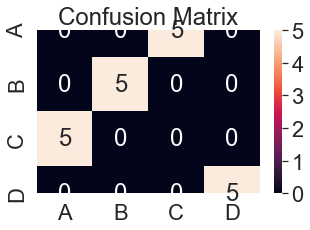

In [223]:
plt.figure(figsize=(5,3))
plt.title('Confusion Matrix')
sns.heatmap(confusion_df, annot=True)

### 7-2. 실전

In [224]:
pred.shape

(41, 122)

In [225]:
종속_column_name = sorted(종속_column_name)
종속_column_name

['%',
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 'A',
 'B',
 'C',
 'D',
 'DH',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 '[',
 ']',
 '^',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'i',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 't',
 'u',
 'x',
 '~',
 'μl',
 '검',
 '결',
 '계',
 '고',
 '과',
 '구',
 '기',
 '남',
 '니',
 '다',
 '단',
 '력',
 '록',
 '뢰',
 '림',
 '명',
 '무',
 '민',
 '반',
 '번',
 '보',
 '본',
 '부',
 '사',
 '산',
 '상',
 '수',
 '안',
 '없',
 '오',
 '원',
 '위',
 '은',
 '을',
 '음',
 '의',
 '이',
 '일',
 '자',
 '전',
 '접',
 '정',
 '증',
 '지',
 '찬',
 '참',
 '첨',
 '체',
 '출',
 '치',
 '태',
 '틀',
 '페',
 '학',
 '한',
 '합',
 '호',
 '화',
 '희']

In [226]:
array = [[0,0,5,0],[0,5,0,0],[5,0,0,0],[0,0,0,5]]
column = 종속_column_name

In [227]:
confusion_df = pd.DataFrame(data=pred, index = predict_lst_val, columns= column).round(0)  #index = predict_lst_val


C:\Users\SURIMWANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SURIMWANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SURIMWANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SURIMWANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SURIMWANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SURIMWANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Gl

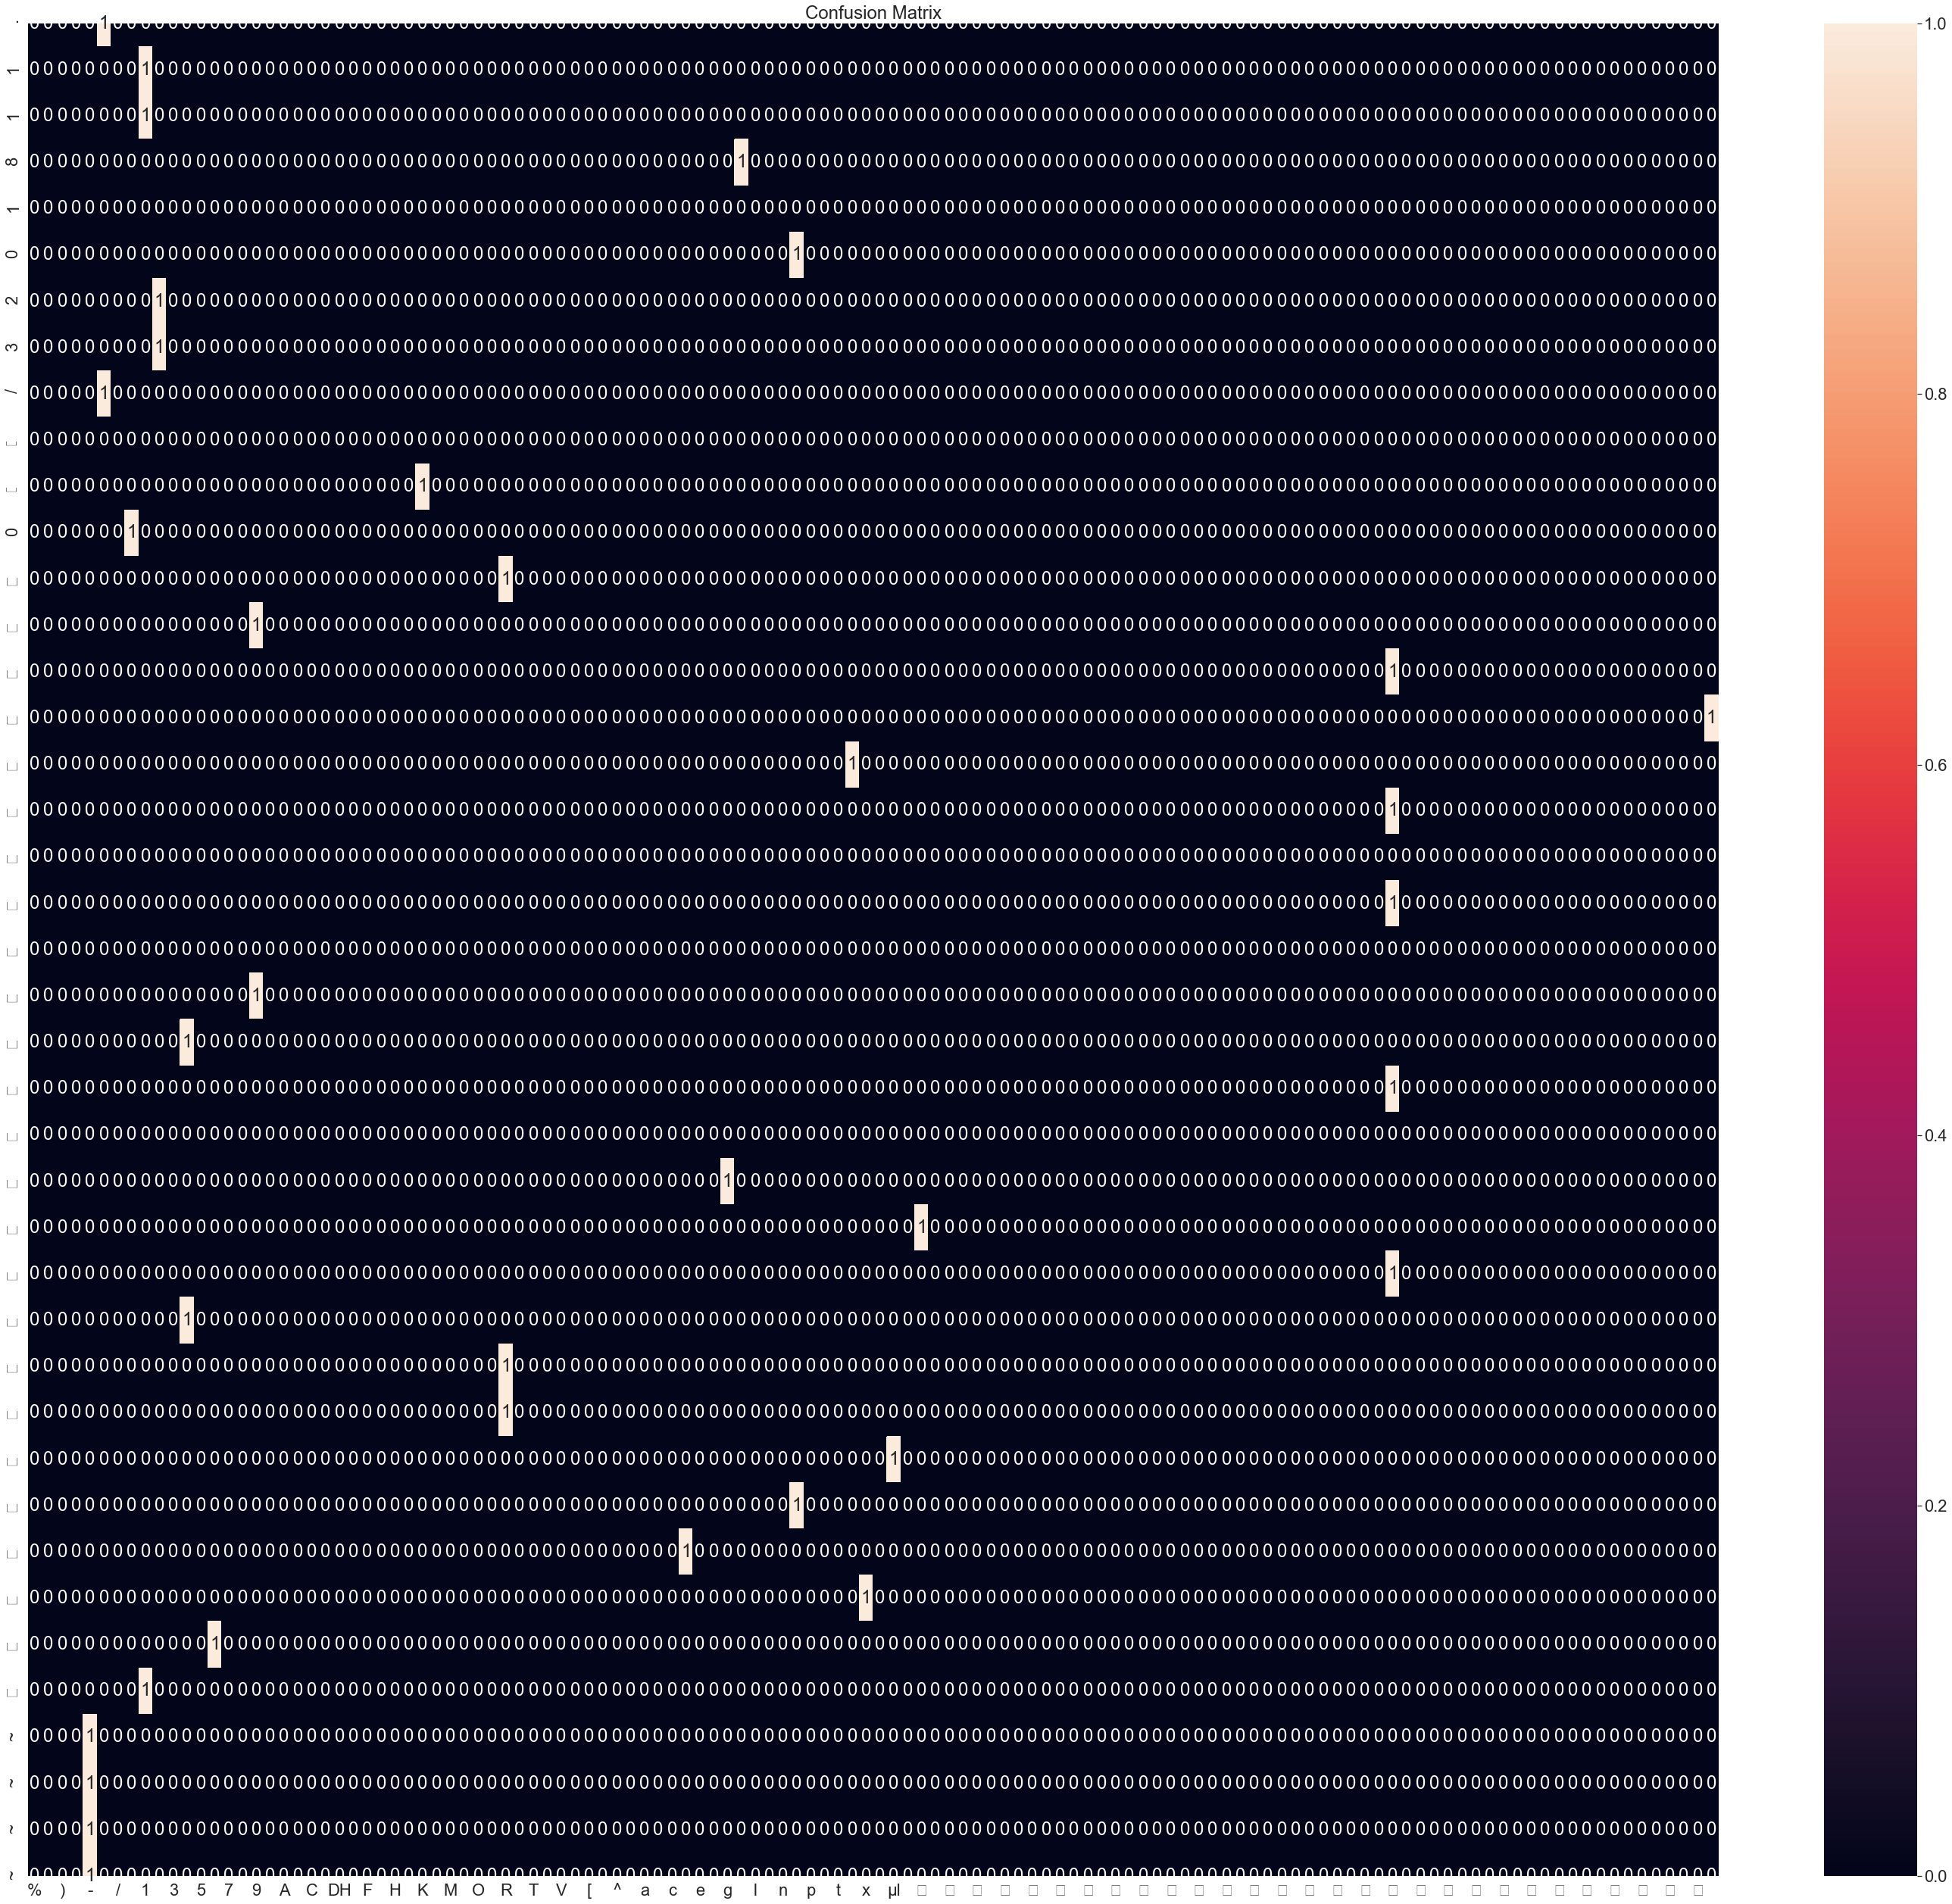

In [228]:
plt.figure(figsize=(50,45))
plt.title('Confusion Matrix')
sns.heatmap(confusion_df, annot=True)

In [229]:
confusion_df = confusion_df.reset_index()
confusion_df

,index,%,(,),",",-,.,/,0,1,...,치,태,틀,페,학,한,합,호,화,희
0,.,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,희,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
pivot_df = pd.pivot_table(confusion_df,index = ['index'], aggfunc = [sum])
pivot_df.columns = pivot_df.columns.droplevel(0)

In [259]:
pivot_df = pivot_df.reset_index()
pivot_df

,index,%,(,),",",-,.,/,0,1,...,치,태,틀,페,학,한,합,호,화,희
0,.,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,~,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,과,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,니,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 전체 목록중에 예측 데이터 제외 나머지도 로우(인덱스)에 넣기

In [260]:
column #전체 리스트
측정리스트 = list(set(predict_lst_val)) #에측한 리스트

### 전체리스트 - 예측한 리스트

In [261]:
a_sub_b = [x for x in column if x not in 측정리스트]

In [262]:
len(a_sub_b)

89

### 피벗한 데이터프레임에 빈 로우 추가하기

In [263]:
add_df = pd.DataFrame(data =np.nan, index = a_sub_b, columns=column).reset_index()
add_df

,index,%,(,),",",-,.,/,0,1,...,치,태,틀,페,학,한,합,호,화,희
0,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,태,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,페,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 피벗한 데이터프레임에 빈 로우 추가하기

In [266]:
concat_df = pd.concat([pivot_df, add_df])

In [270]:
concat_df = concat_df.set_index('index', drop=True)

In [275]:
concat_df = concat_df.fillna(0)

In [280]:
concat_df = concat_df.sort_index()

In [281]:
concat_df

,%,(,),",",-,.,/,0,1,2,...,치,태,틀,페,학,한,합,호,화,희
index,,,,,,,,,,,,,,,,,,,,,
%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
",",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
합,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
호,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
concat_df.to_csv('../data/confusion_table.csv',  encoding = 'utf-8-sig') # index =False,

# 8. need to update labelme